Start here to begin with Stingray.

In [1]:
from __future__ import print_function, division, with_statement, absolute_import, generators, nested_scopes
import numpy as np
%matplotlib inline

# Creating a light curve

In [2]:
from stingray import Lightcurve

A `Lightcurve` object can be created in two ways :

1. From an array of time stamps and an array of counts.
2. From photon arrival times.

## 1. Array of time stamps and counts

Create 1000 time stamps

In [5]:
times = np.arange(1000)
times[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Create 1000 random count values between 0 to 100

In [6]:
counts = np.random.rand(1000)*100
counts[:10]

array([ 58.3252843 ,  37.3983744 ,   4.3803508 ,  82.51305987,
        40.72365665,  69.74066255,  64.19332707,  74.49117359,
        99.02420476,  92.45799443])

Create a Lightcurve object with the times and counts array.

In [7]:
lc = Lightcurve(times, counts)

The number of data points can be counted with the `len` function.

In [8]:
len(lc)

1000

## 2. Photon Arrival Times

In [10]:
arrivals = np.loadtxt("photon_arrivals.txt")
arrivals[:10]

array([ 1.,  1.,  2.,  2.,  2.,  3.,  3.,  3.,  3.,  3.])

In [11]:
lc_new = Lightcurve.make_lightcurve(arrivals, 1)

The time bins and respective counts can be seen with `lc.counts` and `lc.time`

In [12]:
lc_new.counts

array([2, 3, 5, 1, 4, 1, 3, 1, 4])

In [13]:
lc_new.time

array([ 1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5])

# Properties

A Lightcurve object has the following properties :

1. `time` : numpy array of time values
2. `counts` : numpy array of counts per bin values
3. `countrate` : numpy array of counts per second values
4. `n` : Number of data points in the lightcurve
5. `dt` : Time resolution of the light curve
6. `tseg` : Total duration of the light curve
7. `tstart` : Start time of the light curve

In [14]:
lc.n == len(lc)

True

# Operations

## Addition/Subtraction

Two light curves can be summed up or subtracted from each other if they have same time arrays.

In [15]:
lc_rand = Lightcurve(np.arange(1000), [500]*1000)

In [16]:
lc_sum = lc + lc_rand

In [14]:
# We can see the difference between the maximum and minimum values
print(max(lc_sum) - max(lc))
print(min(lc_sum) - min(lc))

500.0
500.0


## Negation

A negation operation on the lightcurve object inverts the count array from positive to negative values.

In [17]:
lc_neg = -lc

In [18]:
lc_sum = lc + lc_neg

In [19]:
np.all(lc_sum.counts == 0)  # All the points on lc and lc_neg cancel each other

True

## Indexing

Count value at a particular time can be obtained using indexing.

In [20]:
lc[120]

57.418054800914298

A Lightcurve can also be sliced to generate a new object.

In [21]:
lc_sliced = lc[100:200]

In [22]:
len(lc_sliced.counts)

100

# Methods

## Concatenation

Two light curves can be combined into a single object using the `join` method. Note that both of them must not have overlapping time arrays.

In [23]:
lc_1 = lc

In [24]:
lc_2 = Lightcurve(np.arange(1000, 2000), np.random.rand(1000)*1000)

In [25]:
lc_long = lc_1.join(lc_2)  # Or vice-versa

In [26]:
print(len(lc_long))

2000


## Truncation

A light curve can also be truncated.

In [27]:
lc_cut = lc_long.truncate(start=0, stop=1000)

In [28]:
len(lc_cut)

1000

**Note** : The `start` and `stop` values can also be given as time values.

In [29]:
lc_cut = lc_long.truncate(start=500, stop=1500, method='time')

In [30]:
lc_cut.time[0], lc_cut.time[-1]

(500, 1499)

## Re-binning

The time resolution (`dt`) can also be changed to a larger value.

**Note** : While the new resolution need not be an integer multiple of the previous time resolution, be aware that if it is not, the last bin will be cut off by the fraction left over by the integer division.

In [31]:
lc_rebinned = lc_long.rebin(2)

In [32]:
print("Old time resolution = " + str(lc_long.dt))
print("Number of data points = " + str(lc_long.n))
print("New time resolution = " + str(lc_rebinned.dt))
print("Number of data points = " + str(lc_rebinned.n))

Old time resolution = 1
Number of data points = 2000
New time resolution = 2.0
Number of data points = 1000


## Sorting

A lightcurve can be sorted using the `sort` method.

In [33]:
new_lc_long = lc_long[:]  # Copying into a new object

In [34]:
new_lc_long.sort(reverse=True)

In [35]:
new_lc_long.counts[0] == max(lc_long)

True

Time array is also changed accordingly.

In [36]:
lc_long[new_lc_long.time[0]] == max(lc_long)

True

## Plotting

A curve can be plotted with the `plot` method.

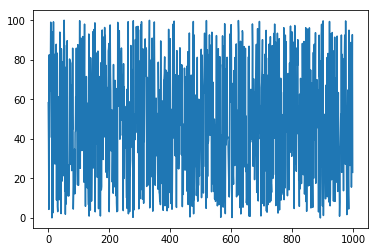

In [37]:
lc.plot()

A plot can also be customized using several keyword arguments.

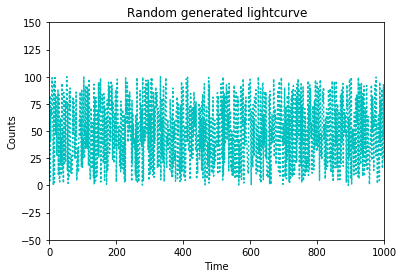

In [38]:
lc.plot(labels=('Time', "Counts"),  # (xlabel, ylabel)
        axis=(0, 1000, -50, 150),  # (xmin, xmax, ymin, ymax)
        title="Random generated lightcurve",
        marker='c:')  # c is for cyan and : is the marker style

The figure drawn can also be saved in a file using keywords arguments in the plot method itself.

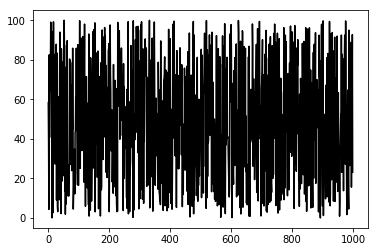

In [39]:
lc.plot(marker = 'k', save=True, filename="lightcurve.png")

**Note** : See `utils.savefig` function for more options on saving a file.

# Sample Data

Stingray also has a sample `Lightcurve` data which can be imported from within the library.

In [40]:
from stingray import sampledata

In [41]:
lc = sampledata.sample_data()

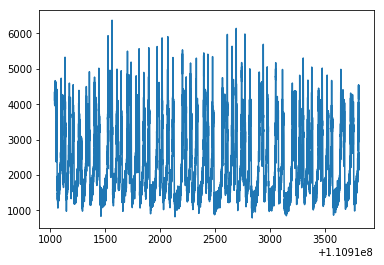

In [42]:
lc.plot()